<a href="https://colab.research.google.com/github/ankitatiwari7870/IPL_EDA/blob/main/IPL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries.

In [1]:
# To load data from file
import pandas as pd 

# To perform mathemetiacal operations
import numpy as np

# To visualize data and get insight from the data
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid the warning that aren't necessarily exceptions
import warnings
warnings.filterwarnings('ignore')

# Sets the backend of seaborn to the 'inline' backend
sns.set()
# Sets the backend of matplotlib to the 'inline' backend
%matplotlib inline
# Pre-defining the font type and size to provide same throughout the code
font = {'family' : 'normal',
        'size'   : 16}
plt.rc('font', **font)


In [2]:
#Loading the csv file from the path
csvfile=('/content/drive/MyDrive/IPL_EDA/IPL Matches 2008-2020.csv')
df_ipl=pd.read_csv(csvfile)

In [3]:
# making a copy dataframe.
df=df_ipl.copy()

In [4]:
df_ipl.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


# QUESTIONS:

1. CITY ANALYSIS
  * MOST MATCHES IN WHICH CITY
  * MOST MATCHES WON BY TEAM OF EVERY CITY.

2. MATCHES ANALYSIS
  * MATCHES PLAYED YEAR WISE.
  * TEAM WISE MATCHES 


3. MATCH WINNER ANALYSIS (winner,result,result_margin)
  * RESULT TYPE NUMBER OF WIN
  * WINNING BY RUNS MARGIN(BIGGEST WIN)
  * WINNIG BY WICKET MARGIN (BIGGEST WIN)


* COMBINIG QUESTION 2 AND 3 WE WILL GET TEAM HISTORY IN IPL


4. PLAYER OF MATCH ANALYSIS
  * WHO WON MOST PLAYER OF MATCH AND WHICH TEAM



5. NEUTRAL VENUE MATCHES ANALYSIS

6. TEAM WISE ANALYSIS (TEAM 1, TEAM 2 , MATCH WINNER , TOSS WINNER )
  * Number of matches played between them and results.
  * Most no of toss wins.

7. TOSS ANALYSIS
  * TOSS WISE MATCH RESULT ANALYSIS.
  * TOSS DECISON ANALYSIS.(BAT,FIELD)
  * TOSS DECISION BASED WINNER.


9. ELIMINATOR MATCHES ANALYSIS.
  * MOST NUMBER OF ELIMINATOR MATCHES WON
  * ELIMINATOR MATCHES MAN OF THE MATCH.

10. UMPIRE ANALYSIS.

 







In [5]:
df.describe()

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [6]:
df.shape

(816, 17)

In [7]:
df.describe(include='object').T

,count,unique,top,freq
city,803,32,Mumbai,101
date,816,596,2014-05-11,2
player_of_match,812,233,AB de Villiers,23
venue,816,36,Eden Gardens,77
team1,816,15,Royal Challengers Bangalore,108
team2,816,15,Mumbai Indians,106
toss_winner,816,15,Mumbai Indians,106
toss_decision,816,2,field,496
winner,812,15,Mumbai Indians,120
result,812,3,wickets,435


In [8]:
#checking info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [9]:
df.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [10]:
df.groupby(['city']).size().reset_index(name='count').sort_values(by='count',ascending=False)[:10]

,city,count
23,Mumbai,101
22,Kolkata,77
10,Delhi,74
2,Bangalore,65
15,Hyderabad,64
8,Chennai,57
7,Chandigarh,56
17,Jaipur,47
26,Pune,38
0,Abu Dhabi,29


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


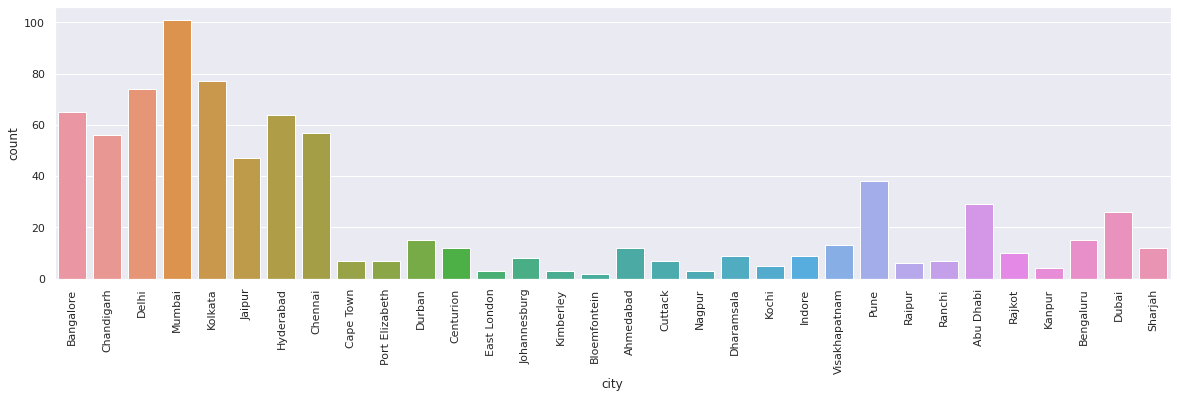

In [11]:
# Using countplot from seaborn to get the count of number of matches played in each city.
sns.set_palette('bright')
plt.figure(figsize = (20,5))
plt.xticks(rotation='vertical')
sns.countplot(x='city',data=df)

In [12]:
df['Date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')


In [13]:
df.groupby(df['Date'].dt.year).size().reset_index(name='count').sort_values(by='count',ascending=False)

,Date,count
5,2013,76
4,2012,74
3,2011,73
2,2010,60
6,2014,60
8,2016,60
10,2018,60
11,2019,60
12,2020,60
7,2015,59


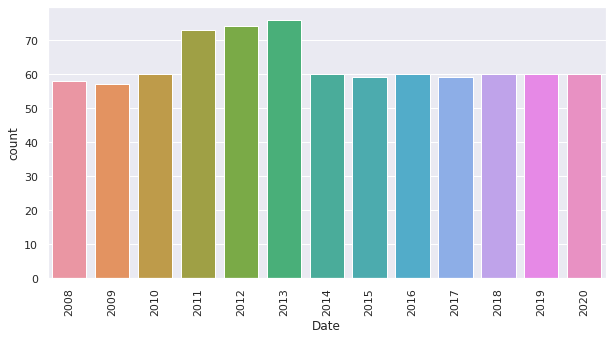

In [14]:
# Using countplot from seaborn to get the count of number of matches played in each year.
sns.set_palette('bright')
plt.figure(figsize = (10,5))
plt.xticks(rotation='vertical')
sns.countplot(x=df['Date'].dt.year,data=df)

In [15]:
df['winner'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Pune Warriors', 'Kochi Tuskers Kerala', nan,
       'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [16]:
win_grpd=df.groupby(['city','winner']).size().reset_index(name='count').sort_values(by='count',ascending=False)[:30]
win_grpd

,city,winner,count
166,Mumbai,Mumbai Indians,53
152,Kolkata,Kolkata Knight Riders,45
56,Chennai,Chennai Super Kings,40
128,Jaipur,Rajasthan Royals,32
49,Chandigarh,Kings XI Punjab,30
116,Hyderabad,Sunrisers Hyderabad,30
23,Bangalore,Royal Challengers Bangalore,29
71,Delhi,Delhi Daredevils,27
158,Mumbai,Chennai Super Kings,11
153,Kolkata,Mumbai Indians,10


In [17]:
win_by_city=win_grpd.drop_duplicates('city')[['city','winner','count']]
win_by_city

,city,winner,count
166,Mumbai,Mumbai Indians,53
152,Kolkata,Kolkata Knight Riders,45
56,Chennai,Chennai Super Kings,40
128,Jaipur,Rajasthan Royals,32
49,Chandigarh,Kings XI Punjab,30
116,Hyderabad,Sunrisers Hyderabad,30
23,Bangalore,Royal Challengers Bangalore,29
71,Delhi,Delhi Daredevils,27
30,Bengaluru,Royal Challengers Bangalore,8
11,Ahmedabad,Rajasthan Royals,7


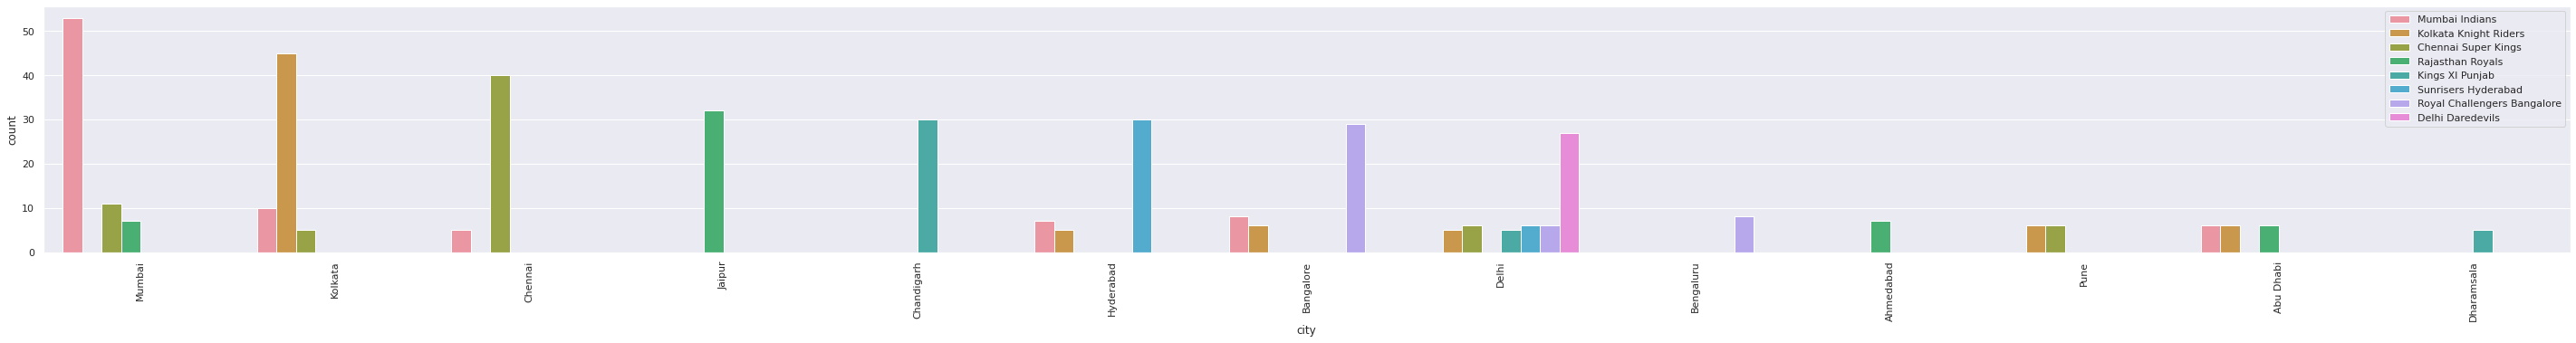

In [18]:
sns.set_palette('copper')
plt.figure(figsize = (50,5))
plt.xticks(rotation='vertical')
ax=sns.barplot(x='city',y='count',hue='winner',data=win_grpd,errwidth=0)
plt.legend(loc = 'upper right')
plt.show()

In [19]:
POM=df.groupby(['player_of_match']).size().reset_index(name='count').sort_values(by='count',ascending=False)[:10]
POM

,player_of_match,count
10,AB de Villiers,23
35,CH Gayle,22
173,RG Sharma,18
44,DA Warner,17
138,MS Dhoni,17
229,YK Pathan,16
206,SR Watson,16
194,SK Raina,14
223,V Kohli,13
58,G Gambhir,13


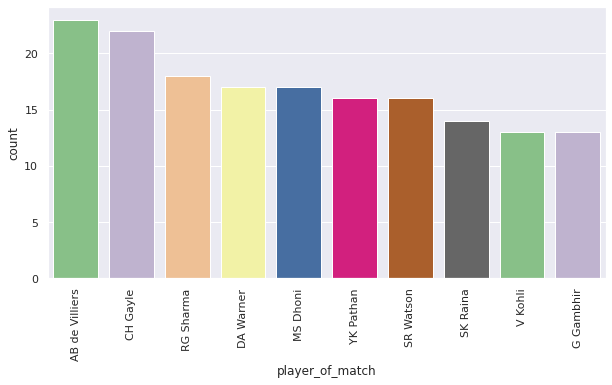

In [20]:

plt.figure(figsize = (10,5))
plt.xticks(rotation='vertical')
sns.barplot(x='player_of_match',y='count',data=POM,palette="Accent")

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'ma...

# EVERY TEAM HISTORY

In [21]:
#total matches played
matches_team= pd.concat([df['team1'],df['team2']])
matches_team_df=matches_team.value_counts().reset_index(name='total_matches_played') 
matches_team_df.rename(columns={'index':'teams'},inplace=True)
matches_team_df

,teams,total_matches_played
0,Mumbai Indians,203
1,Royal Challengers Bangalore,195
2,Kolkata Knight Riders,192
3,Kings XI Punjab,190
4,Chennai Super Kings,178
5,Delhi Daredevils,161
6,Rajasthan Royals,161
7,Sunrisers Hyderabad,124
8,Deccan Chargers,75
9,Pune Warriors,46


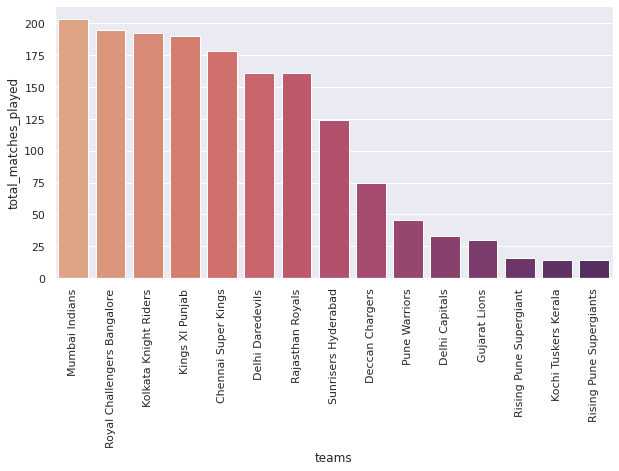

In [22]:


plt.figure(figsize = (10,5))
plt.xticks(rotation='vertical')
sns.barplot(x='teams',y='total_matches_played',data=matches_team_df,palette="flare")


In [23]:
# winner records
winner_df=df['winner'].value_counts().reset_index(name='number_of_wins')
winner_df.rename(columns={'index':'teams'},inplace=True)
winner_df

,teams,number_of_wins
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88
5,Rajasthan Royals,81
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,66
8,Deccan Chargers,29
9,Delhi Capitals,19


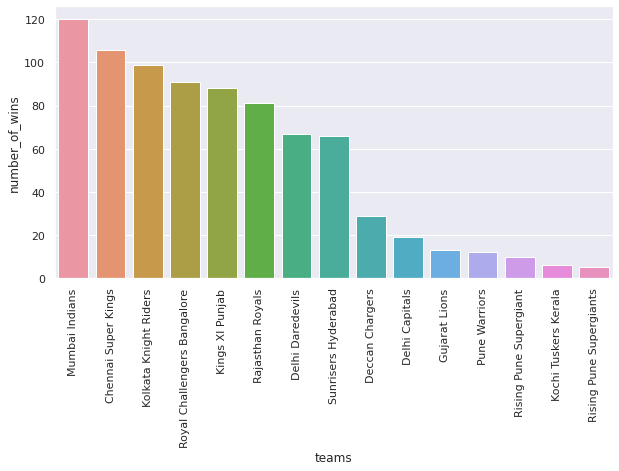

In [24]:
sns.set_palette('bright')
plt.figure(figsize = (10,5))
plt.xticks(rotation='vertical')
sns.barplot(x='teams',y='number_of_wins',data=winner_df)

In [25]:
# team records 
team_record=matches_team_df.merge(winner_df,on='teams',how='inner')
team_record

,teams,total_matches_played,number_of_wins
0,Mumbai Indians,203,120
1,Royal Challengers Bangalore,195,91
2,Kolkata Knight Riders,192,99
3,Kings XI Punjab,190,88
4,Chennai Super Kings,178,106
5,Delhi Daredevils,161,67
6,Rajasthan Royals,161,81
7,Sunrisers Hyderabad,124,66
8,Deccan Chargers,75,29
9,Pune Warriors,46,12


In [26]:
#win_percentage
team_record['win_percentage']=(team_record['number_of_wins']/team_record['total_matches_played'])* 100
team_record

,teams,total_matches_played,number_of_wins,win_percentage
0,Mumbai Indians,203,120,59.113300
1,Royal Challengers Bangalore,195,91,46.666667
2,Kolkata Knight Riders,192,99,51.562500
3,Kings XI Punjab,190,88,46.315789
4,Chennai Super Kings,178,106,59.550562
5,Delhi Daredevils,161,67,41.614907
6,Rajasthan Royals,161,81,50.310559
7,Sunrisers Hyderabad,124,66,53.225806
8,Deccan Chargers,75,29,38.666667
9,Pune Warriors,46,12,26.086957


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


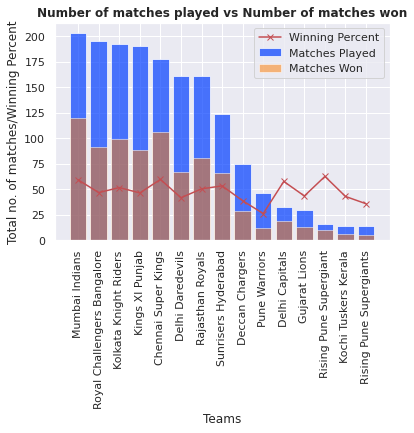

In [27]:
sns.set_palette('bright')
plt.title('Number of matches played vs Number of matches won',fontweight=900)
plt.xlabel('Teams')
plt.ylabel('Total no. of matches/Winning Percent')
plt.xticks(rotation=90)
plt.bar(team_record.teams,team_record.total_matches_played,alpha=0.7)
plt.bar(team_record.teams,team_record.number_of_wins, alpha=0.5)
plt.plot(team_record.teams,team_record.win_percentage,'x-r')
plt.legend(['Winning Percent','Matches Played','Matches Won']);



#MATCH WINNER ANALYSIS (winner,result,result_margin)
* WINNING BY RUNS MARGIN(BIGGEST WIN)
* WINNIG BY WICKET MARGIN (BIGGEST WIN)


In [28]:
df.head(2)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Date
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008-04-18
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008-04-19


In [29]:
df.groupby('result').size().reset_index(name='count')

,result,count
0,runs,364
1,tie,13
2,wickets,435


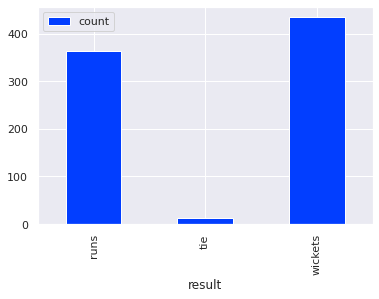

In [30]:
df.groupby('result').size().reset_index(name='count').plot(kind='bar',x='result')

In [31]:
first_bat=df[df['result']=='runs']

In [32]:
first_bat[['team1','team2','winner','result_margin']].sort_values(by='result_margin',ascending=False)[:10]

,team1,team2,winner,result_margin
620,Delhi Daredevils,Mumbai Indians,Mumbai Indians,146.0
560,Royal Challengers Bangalore,Gujarat Lions,Royal Challengers Bangalore,144.0
0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,140.0
497,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,138.0
351,Royal Challengers Bangalore,Pune Warriors,Royal Challengers Bangalore,130.0
706,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,118.0
236,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,111.0
55,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,105.0
676,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,102.0
123,Delhi Daredevils,Mumbai Indians,Mumbai Indians,98.0


In [33]:
second_bat=df[df['result']=='wickets']

In [34]:
second_bat[['team1','team2','winner','result_margin']].sort_values(by='result_margin',ascending=False)

,team1,team2,winner,result_margin
317,Rajasthan Royals,Mumbai Indians,Mumbai Indians,10.0
683,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,10.0
60,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,10.0
531,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,10.0
759,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,10.0
...,...,...,...,...
625,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,2.0
99,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,2.0
636,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,1.0
642,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,1.0


In [35]:
second_bat.groupby(['winner','result_margin']).size().reset_index(name='count').sort_values(by=['result_margin','count'],ascending=[False,False])[:10]

,winner,result_margin,count
91,Royal Challengers Bangalore,10.0,3
9,Chennai Super Kings,10.0,2
62,Mumbai Indians,10.0,2
100,Sunrisers Hyderabad,10.0,2
14,Deccan Chargers,10.0,1
28,Delhi Daredevils,10.0,1
41,Kings XI Punjab,10.0,1
53,Kolkata Knight Riders,10.0,1
74,Rajasthan Royals,10.0,1
90,Royal Challengers Bangalore,9.0,8


* Mumbai Indians has won with most margin of runs(biggest win batting first)

* RCB has won 3 times by 10 wickets(Most win batting 2nd by 10 wickets)